<a href="https://colab.research.google.com/github/aliash98/Causal-Discovery-for-Business-Processes/blob/main/bpi2012_discovery_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
!pip install -U pm4py

In [ ]:
import pm4py

In [ ]:
log = pm4py.read.read_xes('BPI_Challenge_2012.xes')

/usr/local/lib/python3.10/dist-packages/pm4py/util/dt_parsing/parser.py:77: UserWarning: ISO8601 strings are not fully supported with strpfromiso for Python versions below 3.11
  warnings.warn(


parsing log, completed traces ::   0%|          | 0/13087 [00:00<?, ?it/s]

In [ ]:
log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262200 entries, 0 to 262199
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   org:resource          244190 non-null  object             
 1   lifecycle:transition  262200 non-null  object             
 2   concept:name          262200 non-null  object             
 3   time:timestamp        262200 non-null  datetime64[ns, UTC]
 4   case:REG_DATE         262200 non-null  datetime64[ns, UTC]
 5   case:concept:name     262200 non-null  object             
 6   case:AMOUNT_REQ       262200 non-null  object             
dtypes: datetime64[ns, UTC](2), object(5)
memory usage: 14.0+ MB


In [ ]:
log.head()

,org:resource,lifecycle:transition,concept:name,time:timestamp,case:REG_DATE,case:concept:name,case:AMOUNT_REQ
0,112,COMPLETE,A_SUBMITTED,2011-10-01 00:38:44.546000+00:00,2011-10-01 00:38:44.546000+00:00,173688,20000
1,112,COMPLETE,A_PARTLYSUBMITTED,2011-10-01 00:38:44.880000+00:00,2011-10-01 00:38:44.546000+00:00,173688,20000
2,112,COMPLETE,A_PREACCEPTED,2011-10-01 00:39:37.906000+00:00,2011-10-01 00:38:44.546000+00:00,173688,20000
3,112,SCHEDULE,W_Completeren aanvraag,2011-10-01 00:39:38.875000+00:00,2011-10-01 00:38:44.546000+00:00,173688,20000
4,NaN,START,W_Completeren aanvraag,2011-10-01 11:36:46.437000+00:00,2011-10-01 00:38:44.546000+00:00,173688,20000


In [ ]:
pm4py.get_start_activities(log)

{'A_SUBMITTED': 13087}

In [ ]:
pm4py.get_end_activities(log)

{'W_Valideren aanvraag': 2747,
 'W_Wijzigen contractgegevens': 4,
 'A_DECLINED': 3429,
 'W_Completeren aanvraag': 1939,
 'A_CANCELLED': 655,
 'W_Nabellen incomplete dossiers': 452,
 'W_Afhandelen leads': 2234,
 'W_Nabellen offertes': 1290,
 'W_Beoordelen fraude': 57,
 'O_CANCELLED': 279,
 'A_REGISTERED': 1}

In [ ]:
variants = pm4py.get_variants(log)

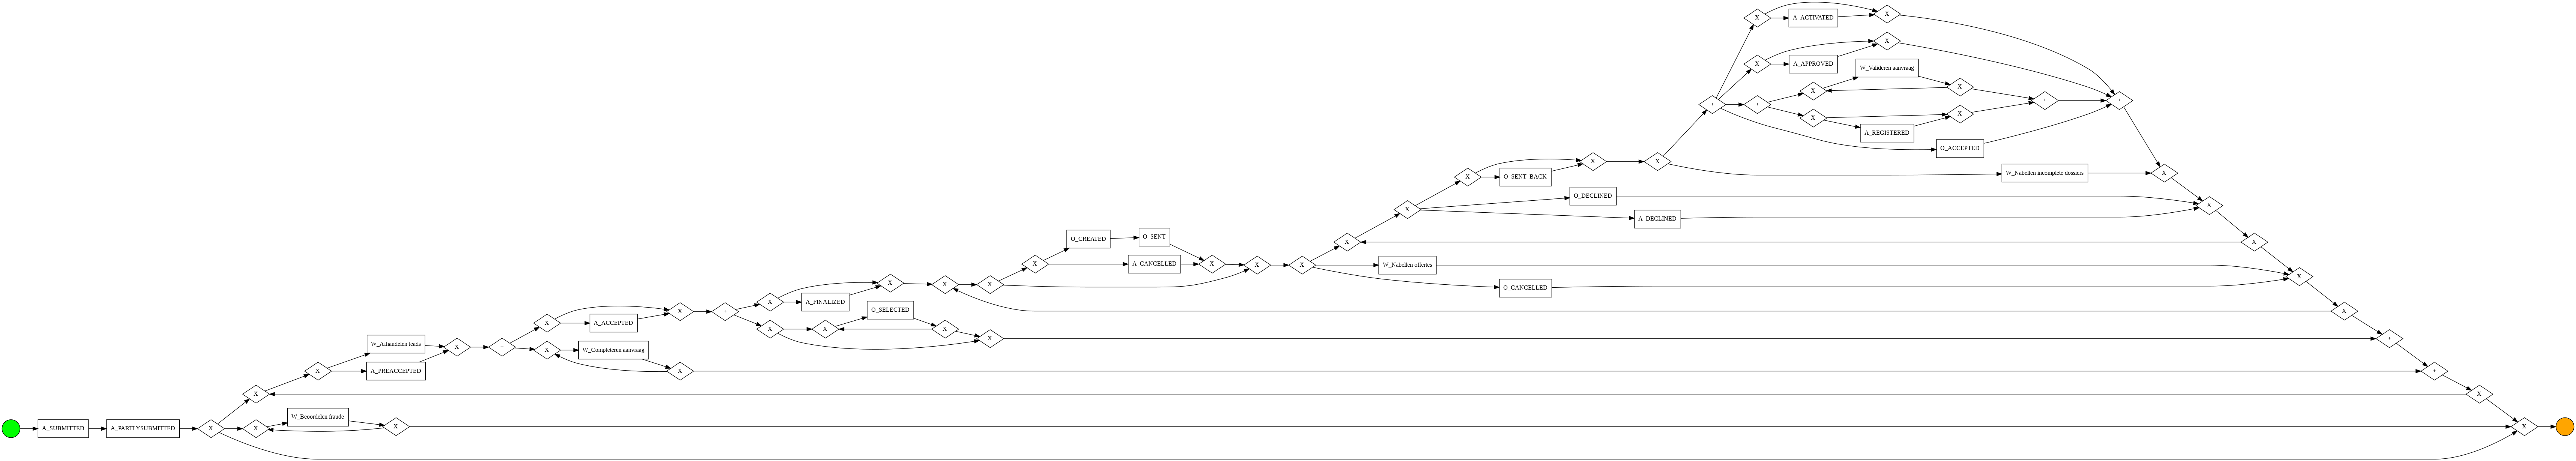

In [ ]:
bpmn_model = pm4py.discover_bpmn_inductive(log, 0.5)
pm4py.view_bpmn(bpmn_model)

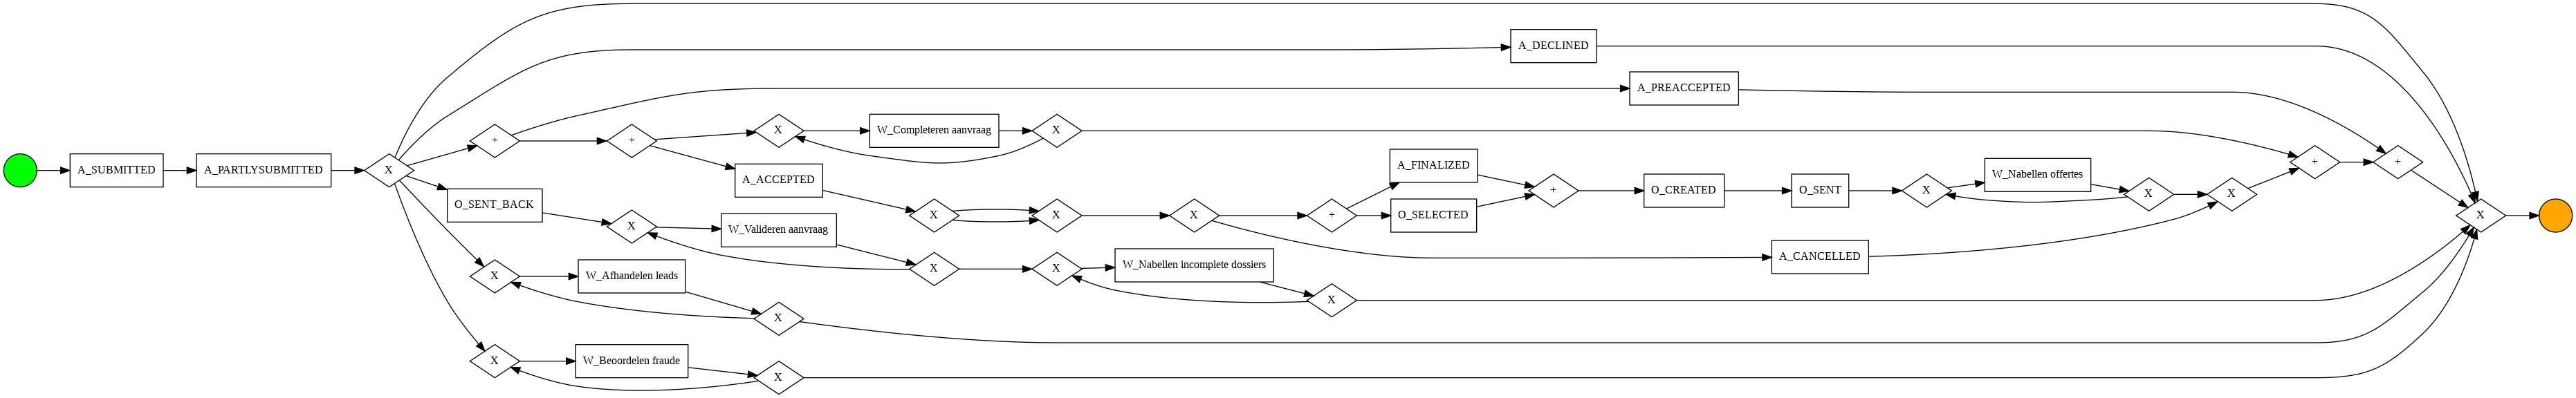

In [ ]:
bpmn_model = pm4py.discover_bpmn_inductive(log, 0.8)
pm4py.view_bpmn(bpmn_model)

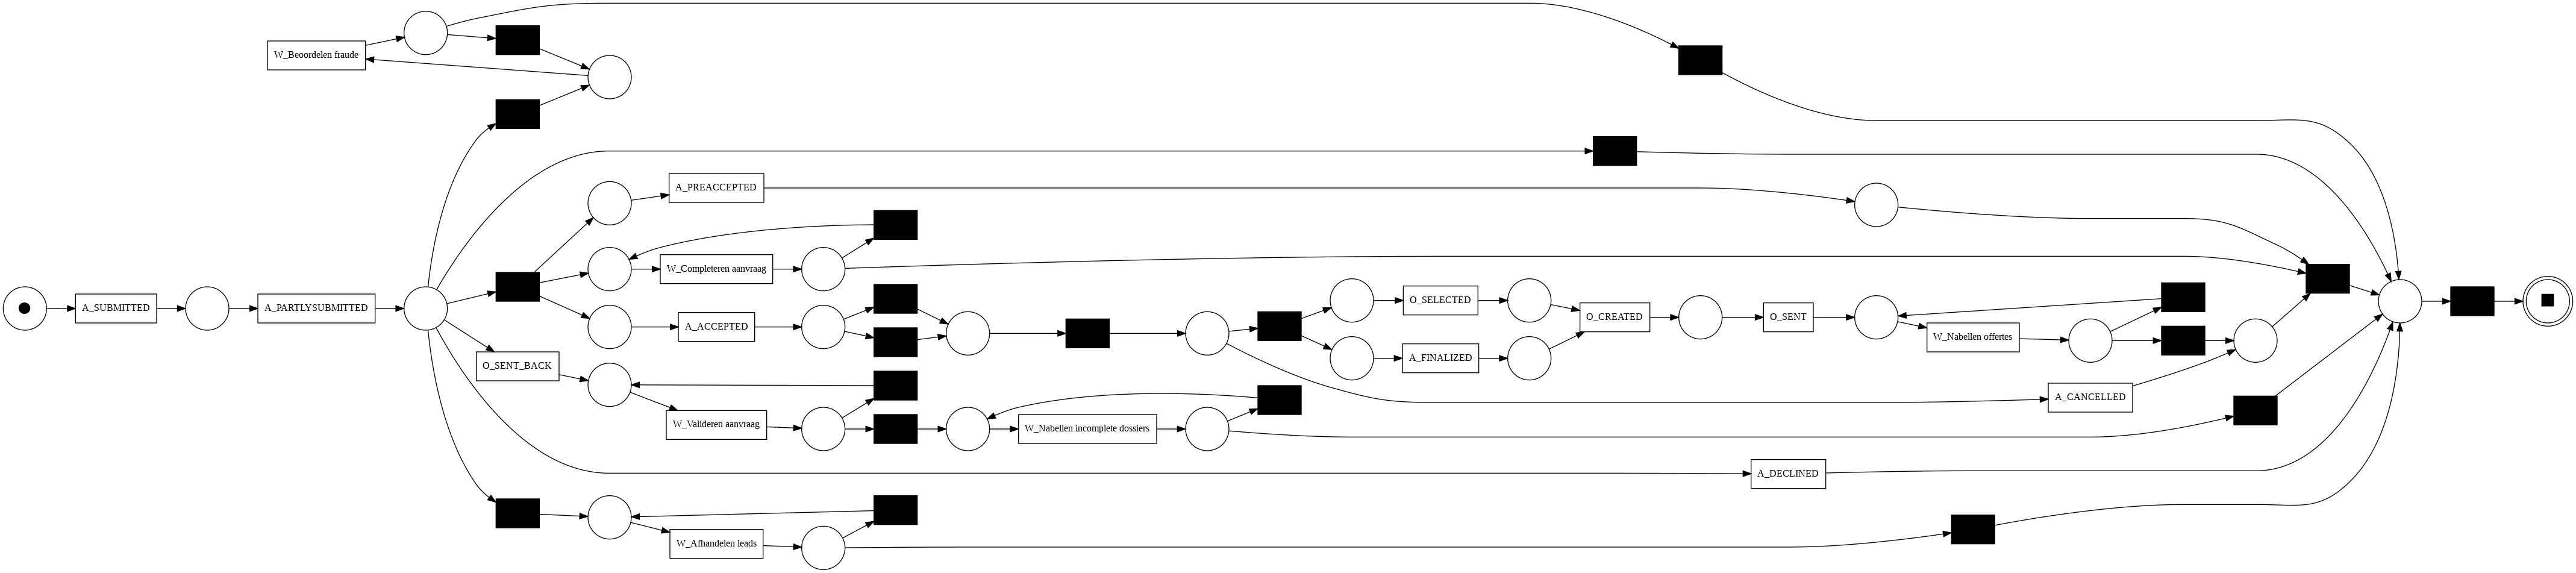

In [ ]:
bpmn_model = pm4py.discover_bpmn_inductive(log, 0.8)
net, a, b = pm4py.convert_to_petri_net(bpmn_model)
pm4py.view_petri_net(net, a, b)

In [ ]:
unique_case_ids = log['case:concept:name'].drop_duplicates().tolist()

# Printing the list of unique case IDs
print(unique_case_ids)

['173688', '173691', '173694', '173697', '173700', '173703', '173706', '173709', '173712', '173715', '173718', '173721', '173724', '173727', '173730', '173733', '173736', '173739', '173742', '173745', '173748', '173751', '173754', '173757', '173760', '173763', '173766', '173769', '173772', '173775', '173778', '173781', '173784', '173787', '173790', '173793', '173796', '173799', '173802', '173805', '173808', '173811', '173814', '173817', '173820', '173823', '173826', '173829', '173832', '173835', '173838', '173841', '173844', '173847', '173850', '173853', '173856', '173859', '173862', '173865', '173868', '173871', '173874', '173877', '173880', '173883', '173886', '173889', '173892', '173895', '173898', '173901', '173904', '173907', '173910', '173913', '173916', '173919', '173922', '173925', '173928', '173931', '173934', '173937', '173940', '173943', '173946', '173949', '173952', '173955', '173958', '173961', '173964', '173979', '173982', '173985', '173988', '173991', '173994', '173997',

In [ ]:
len(unique_case_ids)

13087

In [ ]:
tbr_diagnostics = pm4py.conformance_diagnostics_token_based_replay(log, net, a, b, activity_key='concept:name', case_id_key='case:concept:name', timestamp_key='time:timestamp')

replaying log with TBR, completed traces ::   0%|          | 0/4366 [00:00<?, ?it/s]

In [ ]:
# Total cases are 13087
# Total unique traces are 4366


counter = 0
for i in tbr_diagnostics:
  if i['trace_is_fit'] == True:
    counter += 1
print(counter)
print(len(tbr_diagnostics))
print(counter / len(tbr_diagnostics))


3590
13087
0.2743180255215099


In [ ]:
tbr_diagnostics[0]

{'trace_is_fit': False,
 'trace_fitness': 0.9767441860465116,
 'activated_transitions': [(ide506e725-eaef-43d5-a5b0-9a8b534f6a65, 'A_SUBMITTED'),
  (idc4a1d882-1cac-4050-8a04-f4c38505dff5, 'A_PARTLYSUBMITTED'),
  (sfl_f0868d64-ba44-4e56-a700-9ad2e576a7a4, None),
  (id67484862-7fdf-4f62-bdbc-b4f633897af7, 'A_PREACCEPTED'),
  (ide3983d26-f4fa-4be8-9de0-0d3cd7270ba5, 'W_Completeren aanvraag'),
  (sfl_882b8070-ab21-4fdb-9451-fd8fb5511dde, None),
  (ide3983d26-f4fa-4be8-9de0-0d3cd7270ba5, 'W_Completeren aanvraag'),
  (idcb0fb871-b8a6-4434-987f-7ec649f5f9fa, 'A_ACCEPTED'),
  (sfl_e8f9453c-d129-4667-a989-919968b9ae72, None),
  (ida30ea68f-3b04-4a40-aa8e-de95b87a366b, None),
  (sfl_8f53a773-31c0-4c72-9d18-1e8808efac41, None),
  (id3b853a77-53b5-4a60-8767-4277ee19b788, 'O_SELECTED'),
  (idaab65b0c-0405-4d66-8d15-fa272a983a6e, 'A_FINALIZED'),
  (id4f5cdf55-3457-4dd4-a051-8184947c7104, 'O_CREATED'),
  (id79f82d7e-2ada-4b41-93da-1b734962e23d, 'O_SENT'),
  (id124da340-0b66-40cc-940b-0859dfc64c09, '

In [ ]:
result_dict = dict(zip(unique_case_ids, tbr_diagnostics))

In [ ]:
my_dict_filtered = {key: value for key, value in result_dict.items() if value['trace_is_fit'] == True}

# Printing the filtered dictionary
len(my_dict_filtered)

3590

In [68]:
# let's include everything

my_dict_filtered = {key: value for key, value in result_dict.items()}

In [ ]:
my_dict_filtered.keys()

In [70]:
datatable = pd.DataFrame({'caseid': my_dict_filtered.keys(), 'd1': my_dict_filtered.keys(), 'd2': my_dict_filtered.keys(), 'd3': my_dict_filtered.keys(), 'd4': my_dict_filtered.keys(), 'd5': my_dict_filtered.keys(), 'd6': my_dict_filtered.keys(), 'd7': my_dict_filtered.keys(), 'd8': my_dict_filtered.keys()})

In [ ]:
datatable.head()

In [72]:
def is_activity_executed(activities_list, activity):
    for act in activities_list:
        if act.label == activity:
            return True
    return False

# Function to check if an activity is executed more than once for a case
def is_activity_executed_more_than_once(activities_list, activity):
    count = 0
    for act in activities_list:
        if act.label == activity:
            count += 1
    return count > 1

In [ ]:
str = "(ide506e725-eaef-43d5-a5b0-9a8b534f6a65, 'A_SUBMITTED')"
b
is_activity_executed_more_than_once(tbr_diagnostics[0]['activated_transitions'], 'A_ACCEPTED')
# type(tbr_diagnostics[0]['activated_transitions'][0].label)

In [23]:
cols = ['d2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8' ]

In [73]:
for index, row in datatable.iterrows():
  trace = my_dict_filtered[row['caseid']]['activated_transitions']

  # d1
  if is_activity_executed(trace, 'O_SENT_BACK'):
    row['d1'] = 2
    if is_activity_executed_more_than_once(trace, 'W_Valideren aanvraag'):
      row['d2'] = 1
    else:
      row['d2'] = 0
    if is_activity_executed_more_than_once(trace, 'W_Nabellen incomplete dossiers'):
      row['d3'] = 1
    else:
      row['d3'] = 0

  elif is_activity_executed(trace, 'W_Beoordelen fraude'):
    row['d1'] = 3
    if is_activity_executed_more_than_once(trace, 'W_Beoordelen fraude'):
      row['d4'] = 1
    else:
      row['d4'] = 0

  elif is_activity_executed(trace, 'A_PREACCEPTED'):
    row['d1'] = 4
    if is_activity_executed_more_than_once(trace, 'W_Completeren aanvraag'):
      row['d5'] = 1
    else:
      row['d5'] = 0
    if is_activity_executed(trace, 'A_CANCELLED'):
      row['d6'] = 1
    else:
      row['d6'] = 0
    if is_activity_executed_more_than_once(trace, 'W_Nabellen offertes'):
      row['d5'] = 1
    else:
      row['d5'] = 0

  elif is_activity_executed(trace, 'A_DECLINED'):
    row['d1'] = 5

  elif is_activity_executed(trace, 'W_Afhandelen leads'):
    row['d1'] = 6
    if is_activity_executed_more_than_once(trace, 'W_Afhandelen leads'):
      row['d8'] = 1
    else:
      row['d8'] = 0

  else:
    row['d1'] = 1

  for column in cols:
        # Check if the value in the current cell is equal to 0
        if row[column] == row['caseid']:
            # If it is, set the value to 2
            datatable.at[index, column] = 2


In [85]:
len(datatable[datatable['d1'] == 1])
# len(datatable)

0

In [86]:
# log analysis

log.columns
case_amount = log[['case:AMOUNT_REQ', 'case:concept:name']]

In [ ]:
case_amount.head()

,case:AMOUNT_REQ,case:concept:name
0,20000,173688
1,20000,173688
2,20000,173688
3,20000,173688
4,20000,173688


In [87]:
case_amount = case_amount.drop_duplicates()
case_amount.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13087 entries, 0 to 262194
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   case:AMOUNT_REQ    13087 non-null  object
 1   case:concept:name  13087 non-null  object
dtypes: object(2)
memory usage: 306.7+ KB


In [88]:
case_amount.reset_index().head()

,index,case:AMOUNT_REQ,case:concept:name
0,0,20000,173688
1,26,5000,173691
2,65,7000,173694
3,124,15000,173697
4,127,5000,173700


In [ ]:
import matplotlib.pyplot as plt

# Plot histogram
plt.figure(figsize=(20, 6))
plt.hist(case_amount['case:AMOUNT_REQ'], bins=25, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Integer Column')

plt.show()

In [ ]:
import seaborn as sns

# Plot box plot
sns.boxplot(x=case_amount['case:AMOUNT_REQ'])
# plt.figure(figsize=(20, 6))
plt.xlabel('Value')
plt.title('Box Plot of Integer Column')
plt.show()

In [ ]:
case_amount['case:AMOUNT_REQ']

<class 'pandas.core.series.Series'>
Int64Index: 13087 entries, 0 to 262194
Series name: case:AMOUNT_REQ
Non-Null Count  Dtype 
--------------  ----- 
13087 non-null  object
dtypes: object(1)
memory usage: 204.5+ KB


In [ ]:
# ECDF function
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(data) + 1) / len(data)
    return x, y

# Plot ECDF
plt.figure(figsize=(20, 6))
x, y = ecdf(case_amount['case:AMOUNT_REQ'])
plt.plot(x, y, marker='.', linestyle='none')

plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('Value', fontsize=12)  # Adjust font size
plt.ylabel('ECDF', fontsize=12)   # Adjust font size
plt.title('ECDF of Integer Column')

# Adjust x-axis labels rotation and font size
plt.xticks(rotation=45, fontsize=10)
# plt.xlim(0, 25)

plt.show()


In [89]:
case_amount['case:AMOUNT_REQ'] = case_amount['case:AMOUNT_REQ'].astype(int)

case_amount[case_amount['case:AMOUNT_REQ'] > 19000].count()

case:AMOUNT_REQ      3113
case:concept:name    3113
dtype: int64

In [90]:
case_amount[case_amount['case:AMOUNT_REQ'] > 9500].count()

# three categoriez: 0 < 5500 < 9500 < 1900 < above

case:AMOUNT_REQ      6872
case:concept:name    6872
dtype: int64

In [91]:
case_amount[case_amount['case:AMOUNT_REQ'] > 5500].count()

case:AMOUNT_REQ      9181
case:concept:name    9181
dtype: int64

In [92]:
bins = [0, 5500, 9500, 19000, float('inf')]
labels = [0, 1, 2, 3]

# Discretize the numerical column and assign discrete values
case_amount['discrete_column'] = pd.cut(case_amount['case:AMOUNT_REQ'], bins=bins, labels=labels, include_lowest=True)

# Convert the discrete_column to integer type
case_amount['discrete_column'] = case_amount['discrete_column'].astype(int)


In [95]:
case_amount.rename(columns={'case:concept:name': 'caseid'}, inplace=True)

In [96]:
case_amount.head()

,case:AMOUNT_REQ,caseid,discrete_column
0,20000,173688,3
26,5000,173691,0
65,7000,173694,1
124,15000,173697,2
127,5000,173700,0


In [94]:
datatable.head()

,caseid,d1,d2,d3,d4,d5,d6,d7,d8
0,173688,2,1,0,2,2,2,2,2
1,173691,2,1,0,2,2,2,2,2
2,173694,2,1,0,2,2,2,2,2
3,173697,5,2,2,2,2,2,2,2
4,173700,5,2,2,2,2,2,2,2


In [102]:
merged_df = pd.merge(datatable, case_amount, on='caseid')


In [103]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13087 entries, 0 to 13086
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   caseid           13087 non-null  object
 1   d1               13087 non-null  object
 2   d2               13087 non-null  object
 3   d3               13087 non-null  object
 4   d4               13087 non-null  object
 5   d5               13087 non-null  object
 6   d6               13087 non-null  object
 7   d7               13087 non-null  object
 8   d8               13087 non-null  object
 9   case:AMOUNT_REQ  13087 non-null  int64 
 10  discrete_column  13087 non-null  int64 
dtypes: int64(2), object(9)
memory usage: 1.2+ MB


In [104]:
merged_df.drop(columns=['case:AMOUNT_REQ', 'caseid'], inplace=True)

In [105]:
merged_df.head()

,d1,d2,d3,d4,d5,d6,d7,d8,discrete_column
0,2,1,0,2,2,2,2,2,3
1,2,1,0,2,2,2,2,2,0
2,2,1,0,2,2,2,2,2,1
3,5,2,2,2,2,2,2,2,2
4,5,2,2,2,2,2,2,2,0


In [106]:
merged_df.to_csv('trainingData.csv', index=False)

In [ ]:
from collections import Counter
from pm4py.objects.log.importer.xes import importer as xes_importer

# Import your event log
log = xes_importer.apply('BPI_Challenge_2012.xes')

# Extract traces from the event log
traces = [tuple(event['concept:name'] for event in case) for case in log]

# # Count the frequency of each trace
# trace_counts = Counter(traces)

# # Get the most frequent traces
# most_common_traces = trace_counts.most_common()

# # Print the most frequent traces
# for trace, count in most_common_traces:
#     print(f'Trace: {trace}, Frequency: {count}')


parsing log, completed traces ::   0%|          | 0/13087 [00:00<?, ?it/s]

In [ ]:
len(traces)

13087

In [ ]:
# Count the frequency of each trace
trace_counts = Counter(traces)

# Get the most frequent traces
most_common_traces = trace_counts.most_common()

In [ ]:
len(trace_counts)

4366

In [ ]:
trace_counts

In [ ]:
most_common_traces[7] # let's only keep

(('A_SUBMITTED',
  'A_PARTLYSUBMITTED',
  'A_PREACCEPTED',
  'W_Completeren aanvraag',
  'W_Completeren aanvraag',
  'W_Completeren aanvraag',
  'W_Completeren aanvraag',
  'A_DECLINED',
  'W_Completeren aanvraag'),
 93)

In [ ]:
# from pm4py.algo.discovery.inductive import algorithm as inductive_miner

net, im, fm = pm4py.discover_petri_net_inductive(log, 0.8)

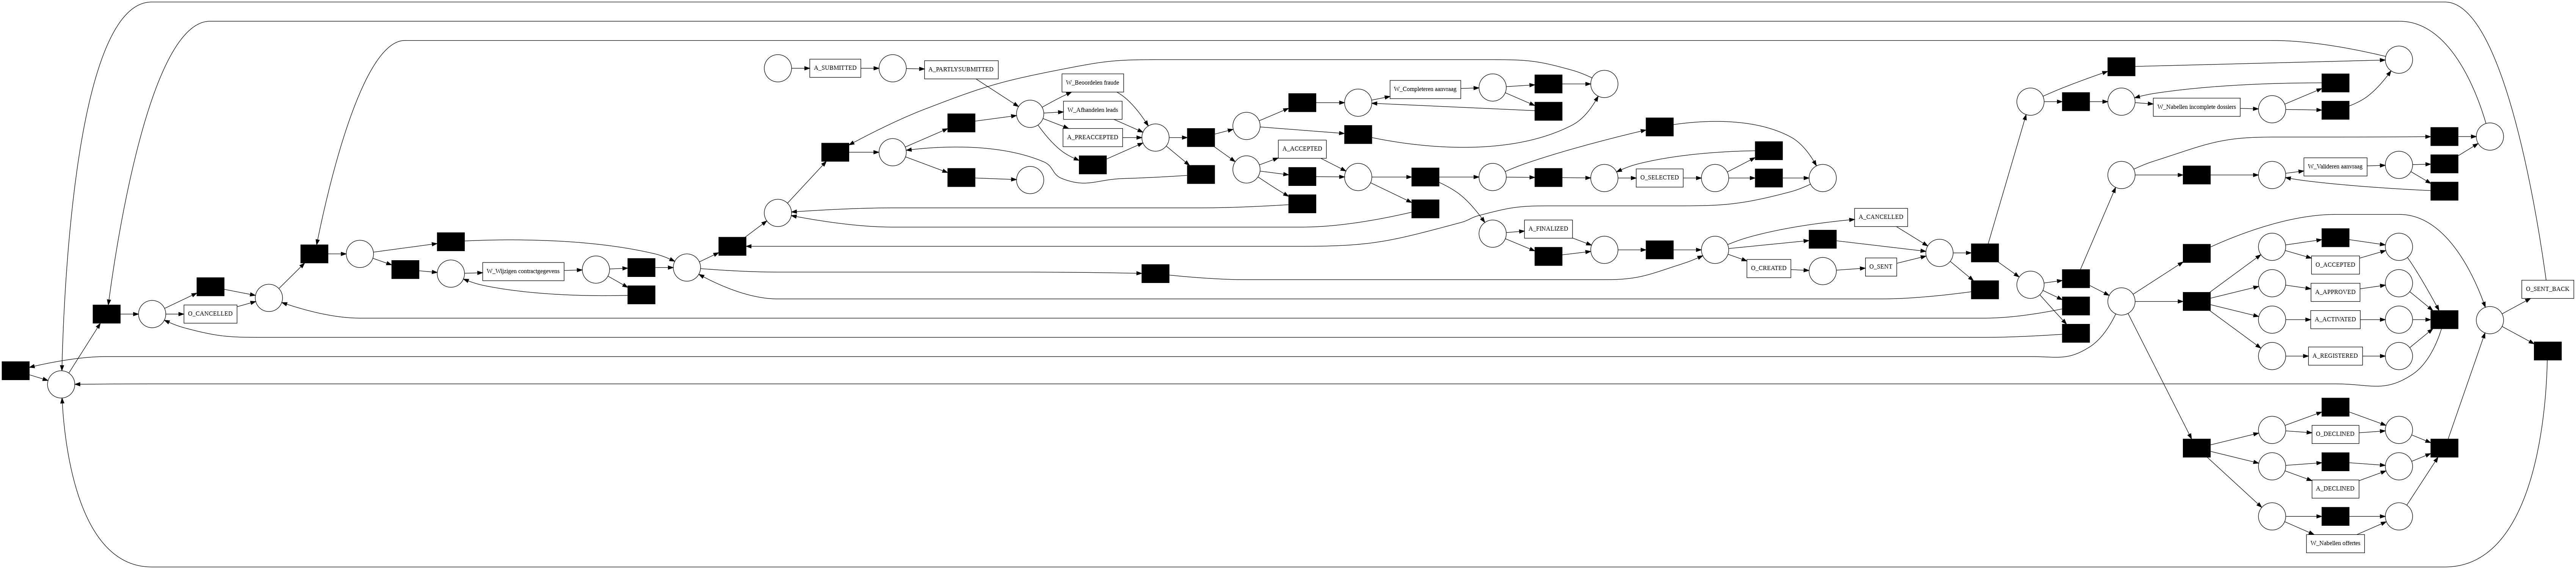

In [ ]:
pm4py.view_petri_net(net)